# CS166 SESSION 14.1 PCW

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as sts 
import matplotlib.pyplot as plt 

## Task 1: Manual Monte Carlo Parameter Estimation 

$\Omega_b = 0.075$

$\Omega_c = 0.325$

$\Omega_\Lambda = 0.65$

## Task 2: What is the Protactinium Half-Decay? 

In [6]:
df = pd.read_csv("https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv")

df.head(n = 3)


,time,count_rate
0,0,32
1,5,28
2,10,29


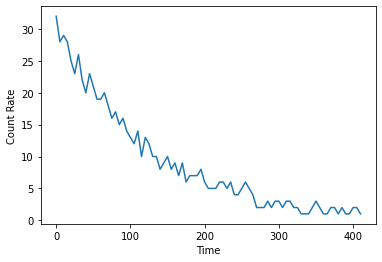

In [10]:
t_values = np.array(df['time'], dtype = 'float')
count_values = np.array(df['count_rate'], dtype = 'float')

plt.plot(t_values, count_values)
plt.xlabel("Time")
plt.ylabel("Count Rate")
plt.show()

In [33]:
# Model 
def N(t, lambda_):
    # lambda: proposed 
    # t: data 
    return (32 * np.exp(-lambda_ * t))

# Chi-Squared 
def chi2(dx, dy, lambda_):
    s = 0 
    for i in range(len(dx)):
        s += (N(dx[i], lambda_) - dy[i])**2
        
    return s/len(dx)

# Likelihood 
def p(dx, dy, lambda_):
    return (-chi2(dx, dy, lambda_))

# Initial guess for model parameters 
lambda_current = 1 
p_current = p(t_values, count_values, lambda_current)

chain = [] 

# Trial Phase 
for i in range(10000):
    noise = sts.norm.rvs(loc = 0, scale = 1)
    
    lambda_proposed = lambda_current + noise 
    
    p_proposed = p(t_values, count_values, lambda_proposed)
    
    ratio = np.exp(p_proposed - p_current)
    r = np.random.rand() 
    
    if r < ratio:
        lambda_current = lambda_proposed 
        p_current = p_proposed 
        
    if i > 100: # we use 100 as warm-up steps 
        chain.append(lambda_current)


<ipython-input-33-431159012b0f>:11: RuntimeWarning: overflow encountered in double_scalars
  s += (N(dx[i], lambda_) - dy[i])**2
<ipython-input-33-431159012b0f>:5: RuntimeWarning: overflow encountered in double_scalars
  return (32 * np.exp(-lambda_ * t))
<ipython-input-33-431159012b0f>:5: RuntimeWarning: overflow encountered in exp
  return (32 * np.exp(-lambda_ * t))


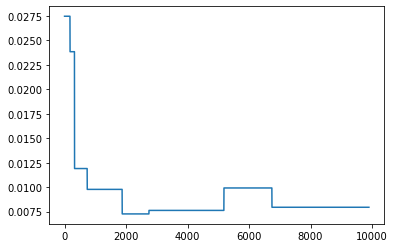

In [42]:
plt.plot(chain)
plt.show()

In [47]:
from scipy import optimize as opt 

best_fits = [] 

lambd_curr = 1 

def N(t, lambda_):
    # lambda: proposed 
    # t: data 
    return (32 * np.exp(-lambda_ * t))

def func(lambd, t):
    return 32 * np.exp(-lambd *t) 

for i in range(10000):
    
    curr_readings = N(t_values, lambd_curr) + sts.norm.rvs(loc = 0, scale = 1)
    
    best_lambd = opt.curve_fit(func, t_values, count_values, lambd_curr)
    
    best_fits.append(best_lambd)
    

<ipython-input-47-00f9b189820b>:13: RuntimeWarning: overflow encountered in exp
  return 32 * np.exp(-lambd *t)


(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([-0.491549, -0.391549, -0.291549, -0.191549, -0.091549,  0.008451,
         0.108451,  0.208451,  0.308451,  0.408451,  0.508451]),
 <BarContainer object of 10 artists>)

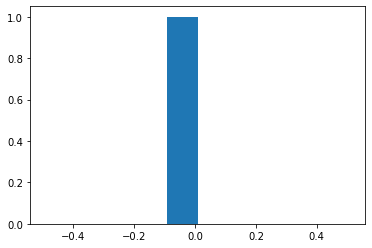

In [53]:
plt.hist(best_fits[0][0])

In [55]:
func(t_values, best_fits[0][0])

array([32.        , 30.67600944, 29.40679859, 28.19010098, 27.02374386,
       25.90564443, 24.83380603, 23.80631463, 22.82133539, 21.87710937,
       20.97195042, 20.10424215, 19.27243507, 18.47504375, 17.71064426,
       16.97787158, 16.27541715, 15.60202657, 14.95649732, 14.33767665,
       13.74445951, 13.17578655, 12.63064227, 12.10805317, 11.60708604,
       11.12684628, 10.6664763 , 10.22515399,  9.80209126,  9.39653262,
        9.00775386,  8.6350607 ,  8.27778761,  7.93529659,  7.60697603,
        7.29223964,  6.99052538,  6.70129445,  6.42403037,  6.15823801,
        5.90344273,  5.65918952,  5.42504223,  5.2005827 ,  4.98541013,
        4.77914026,  4.58140474,  4.39185047,  4.21013895,  4.03594569,
        3.86895963,  3.70888257,  3.55542864,  3.40832383,  3.26730544,
        3.13212164,  3.00253103,  2.87830219,  2.75921329,  2.64505165,
        2.53561342,  2.43070316,  2.33013354,  2.23372495,  2.14130524,
        2.05270937,  1.96777912,  1.88636284,  1.80831514,  1.73